<a href="https://colab.research.google.com/github/sanadv/MLCourse/blob/main/Lesson_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

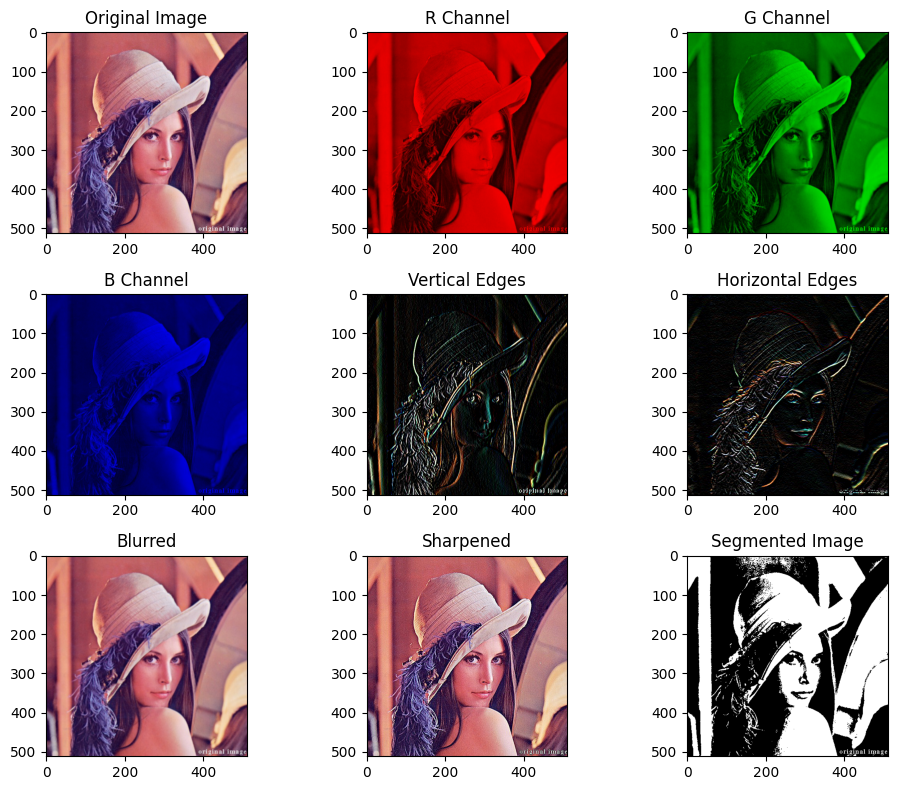

In [1]:
# 7.1 Image processing operations
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'lena.jpeg'  # Update this to the path of your image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Plot the original image
plt.figure(figsize=(10, 8))
plt.subplot(3, 3, 1)
plt.imshow(image)
plt.title('Original Image')

# Split the image into R, G, B channels
for i, color in enumerate(['R', 'G', 'B']):
    temp_image = np.zeros(image.shape, dtype='uint8')
    temp_image[:, :, i] = image[:, :, i]
    plt.subplot(3, 3, i+2)
    plt.imshow(temp_image)
    plt.title(f'{color} Channel')

# Define kernels for edge detection, blurring, and sharpening
kernel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
kernel_blur = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply kernels using filter2D
edges_vertical = cv2.filter2D(image, -1, kernel_vertical)
edges_horizontal = cv2.filter2D(image, -1, kernel_horizontal)
blurred = cv2.filter2D(image, -1, kernel_blur)
sharpened = cv2.filter2D(image, -1, kernel_sharpen)

# Plot the results
images = [edges_vertical, edges_horizontal, blurred, sharpened]
titles = ['Vertical Edges', 'Horizontal Edges', 'Blurred', 'Sharpened']
for i in range(4):
    plt.subplot(3, 3, i+5)
    plt.imshow(images[i])
    plt.title(titles[i])

# Simple segmentation (thresholding)
# Convert to grayscale and apply a threshold
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, segmented = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.subplot(3, 3, 9)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')

plt.tight_layout()
plt.show()


1/1 [==============================] - 3s 3s/step


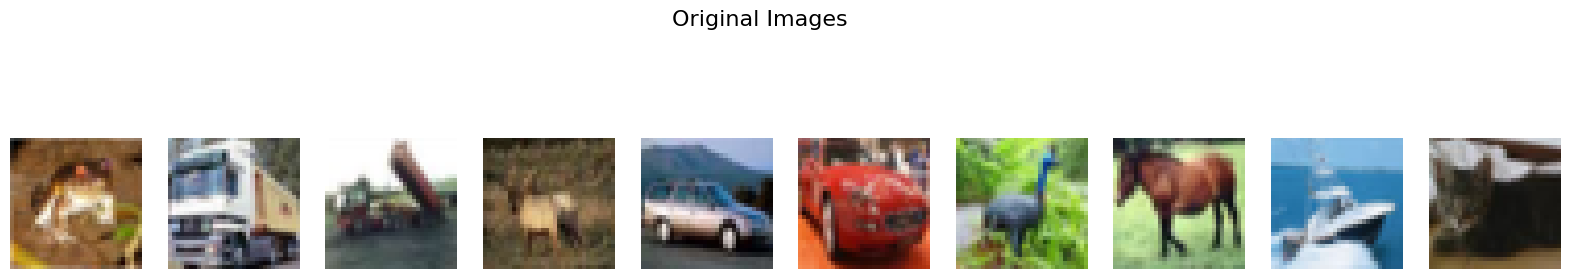

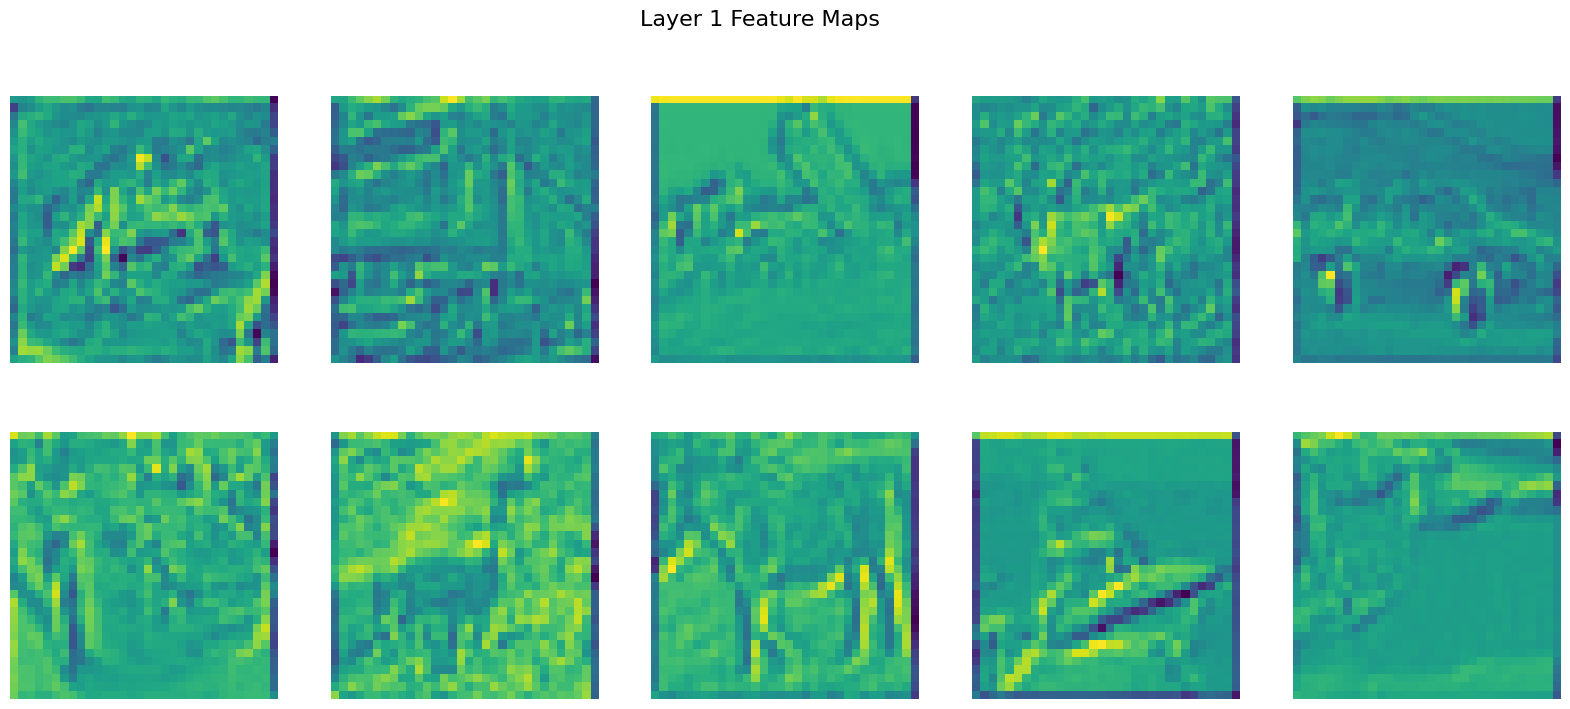

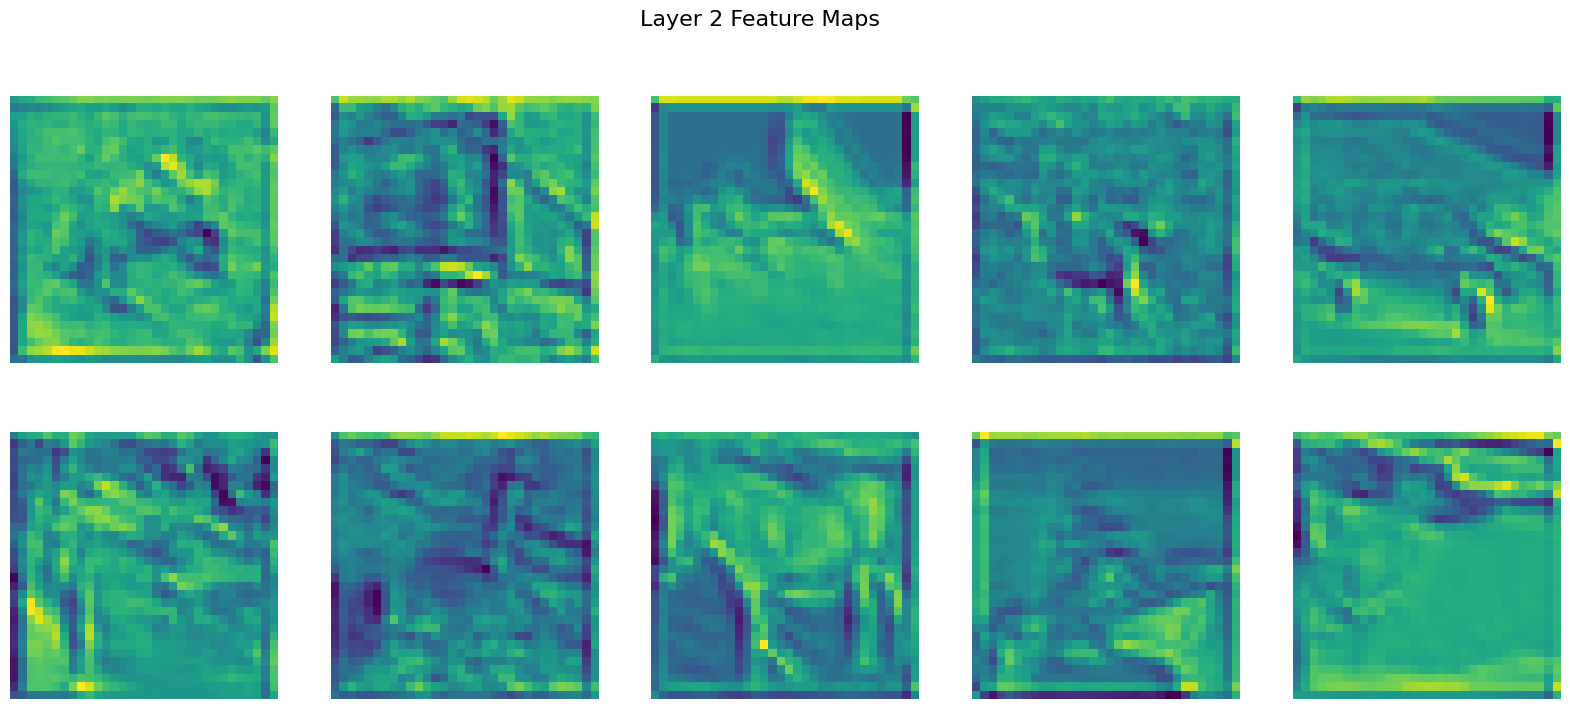

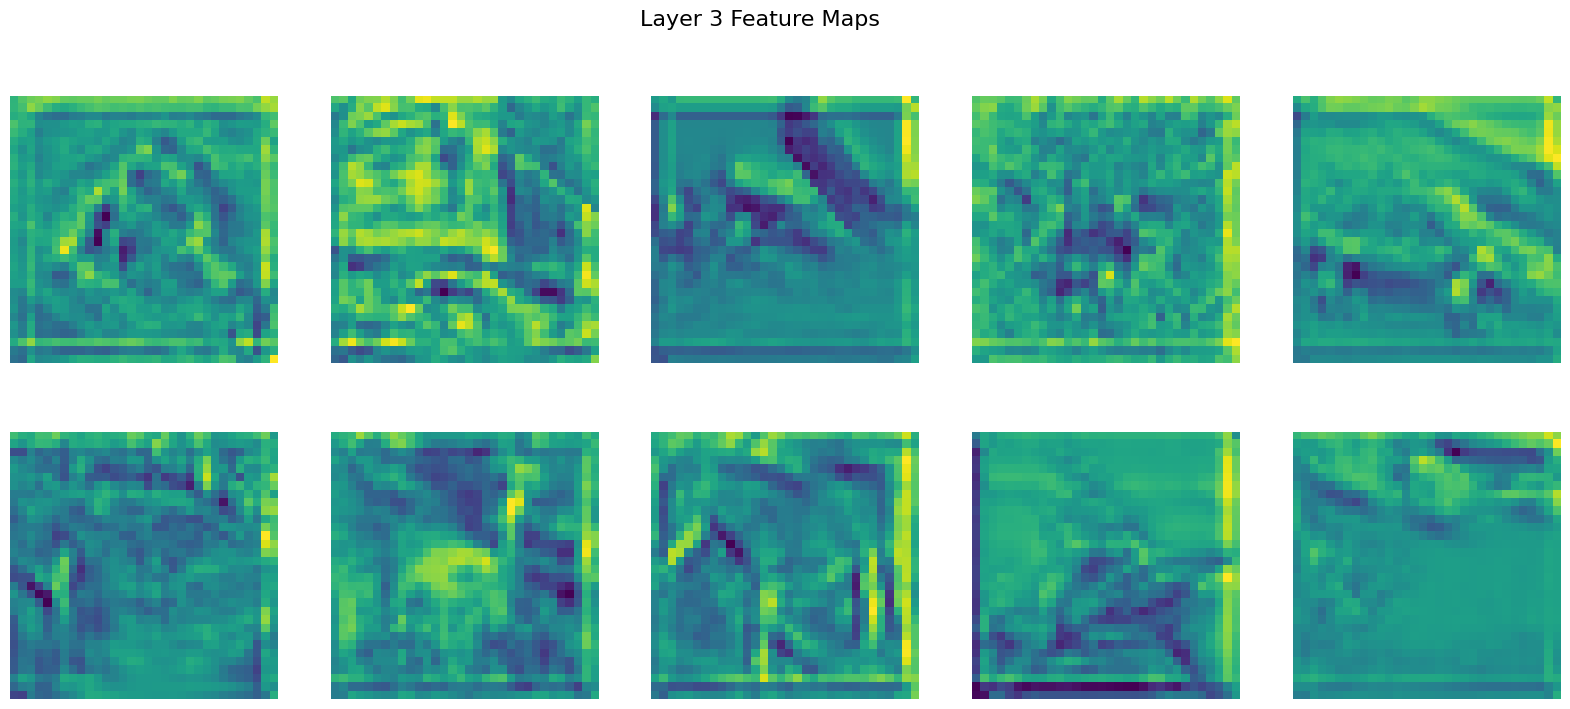

In [1]:

# 7.2 Conv2D Layer
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# Load CIFAR-10 dataset
(x_train, _), (_, _) = cifar10.load_data()

# Select the first 10 images
x_sample = x_train[:10].astype('float32') / 255.0  # Normalize the data

# Define a simple CNN model with 3 convolutional layers
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=x_sample.shape[1:]),
    Activation('relu'),
    Conv2D(32, (3, 3), padding='same'),
    Activation('relu'),
    Conv2D(32, (3, 3), padding='same'),
    Activation('relu'),
])

# Generate feature maps for each convolutional layer
# We'll use the outputs of the layers directly before activation for visualization
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Predict to get the activations
activations = activation_model.predict(x_sample)

# Plot the original images
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_sample[i])
    plt.axis('off')
plt.suptitle('Original Images', fontsize=16)
plt.show()

# Function to plot the feature maps
def plot_feature_maps(feature_maps, layer_num):
    plt.figure(figsize=(20, 8))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(feature_maps[i, :, :, 0], cmap='viridis')  # Just show the first filter
        plt.axis('off')
    plt.suptitle(f'Layer {layer_num} Feature Maps', fontsize=16)
    plt.show()

# Plot the feature maps after each convolutional layer
for layer_num, feature_maps in enumerate(activations, start=1):
    plot_feature_maps(feature_maps, layer_num)


In [3]:
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense

# Assuming x_sample and model are defined as in the previous code snippet

# Modify the model for CIFAR-10 classification
model = Sequential([
    # Convolutional base
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_sample.shape[1:]),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Flatten(),
    # Dense classifier
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load the full CIFAR-10 training and test datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.2, batch_size=64)


Epoch 1/5
625/625 [==============================] - 9s 12ms/step - loss: 1.5532 - accuracy: 0.4340 - val_loss: 1.2545 - val_accuracy: 0.5475
Epoch 2/5
625/625 [==============================] - 4s 6ms/step - loss: 1.0991 - accuracy: 0.6092 - val_loss: 0.9814 - val_accuracy: 0.6543
Epoch 3/5
625/625 [==============================] - 4s 7ms/step - loss: 0.8731 - accuracy: 0.6953 - val_loss: 0.8788 - val_accuracy: 0.6941
Epoch 4/5
625/625 [==============================] - 4s 7ms/step - loss: 0.7309 - accuracy: 0.7438 - val_loss: 0.8116 - val_accuracy: 0.7145
Epoch 5/5
625/625 [==============================] - 4s 6ms/step - loss: 0.6045 - accuracy: 0.7877 - val_loss: 0.8196 - val_accuracy: 0.7269


1/1 [==============================] - 0s 140ms/step


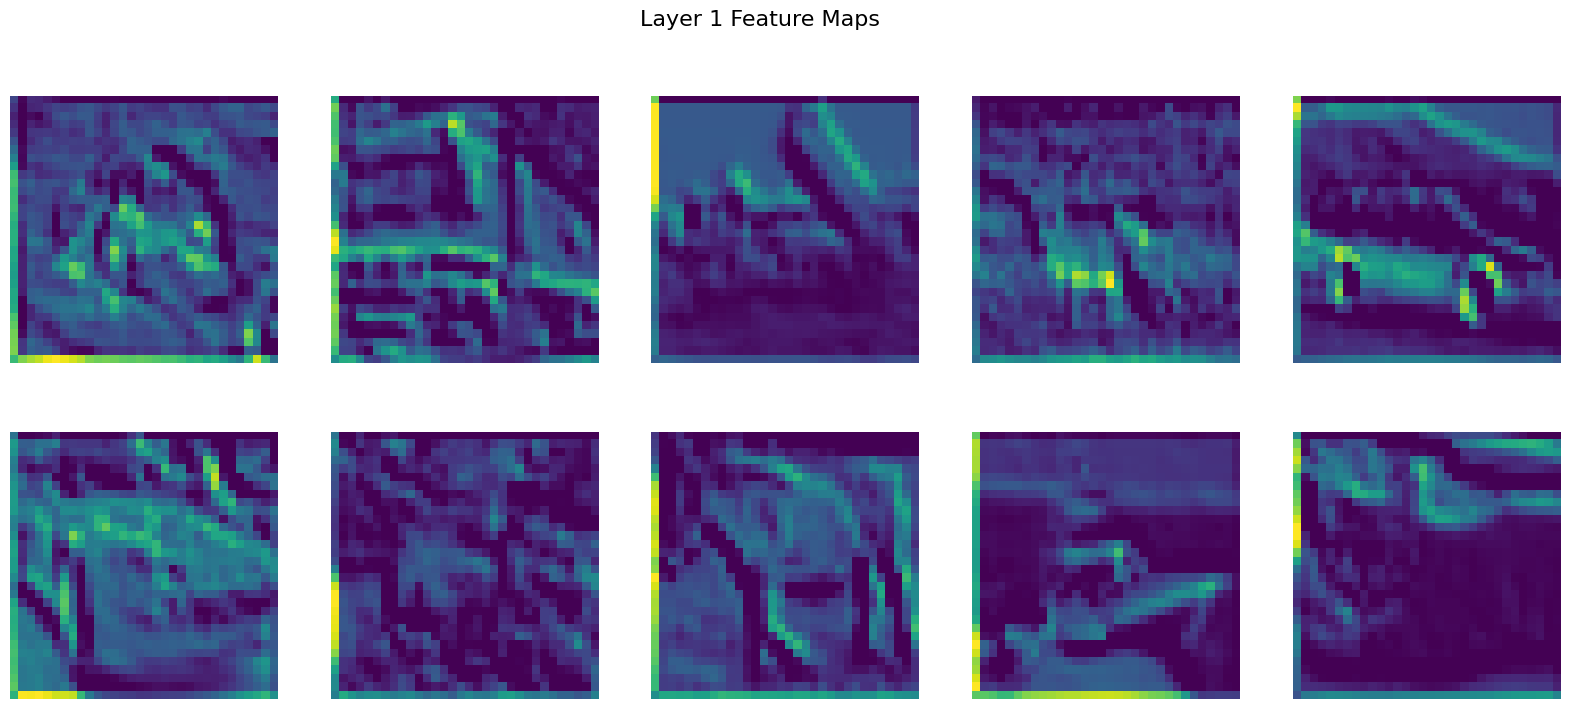

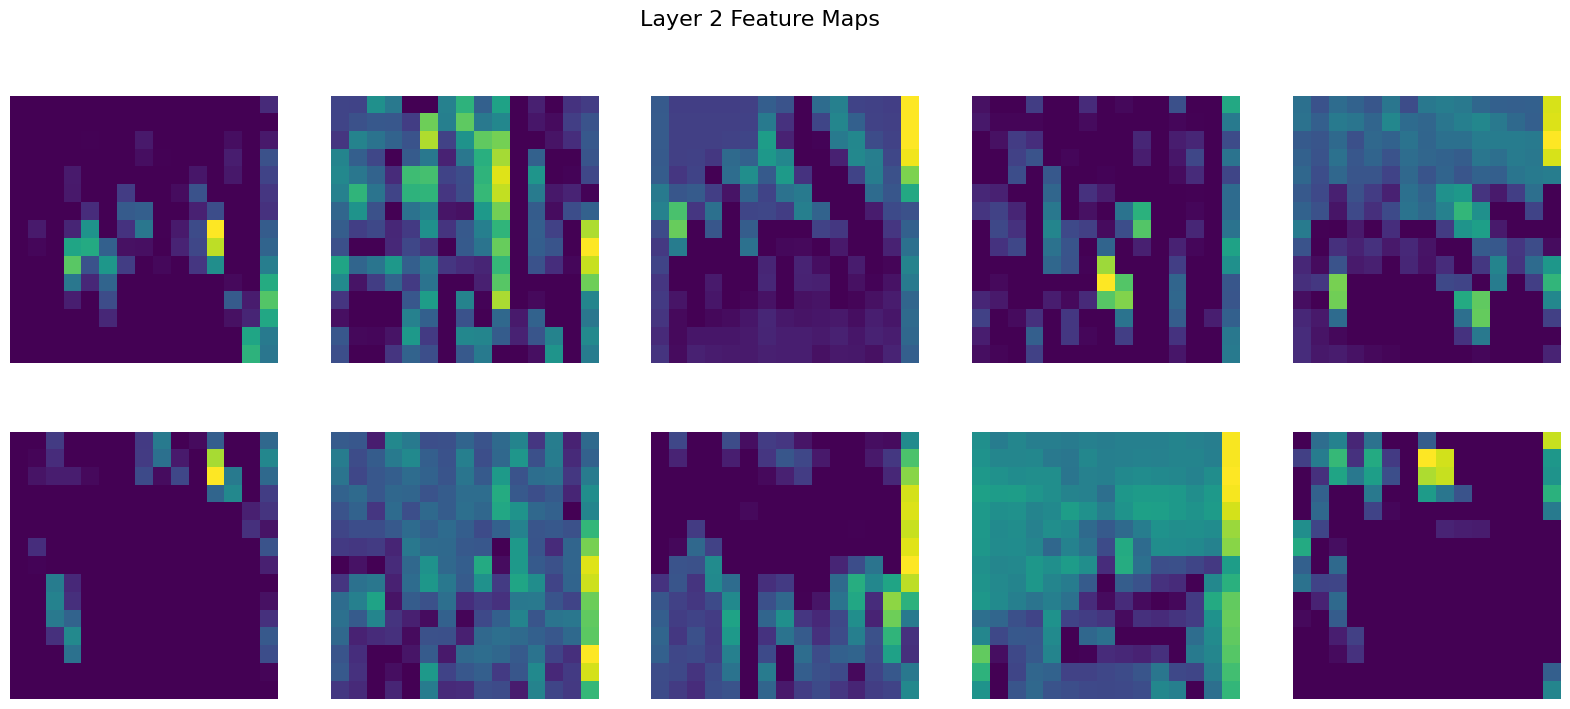

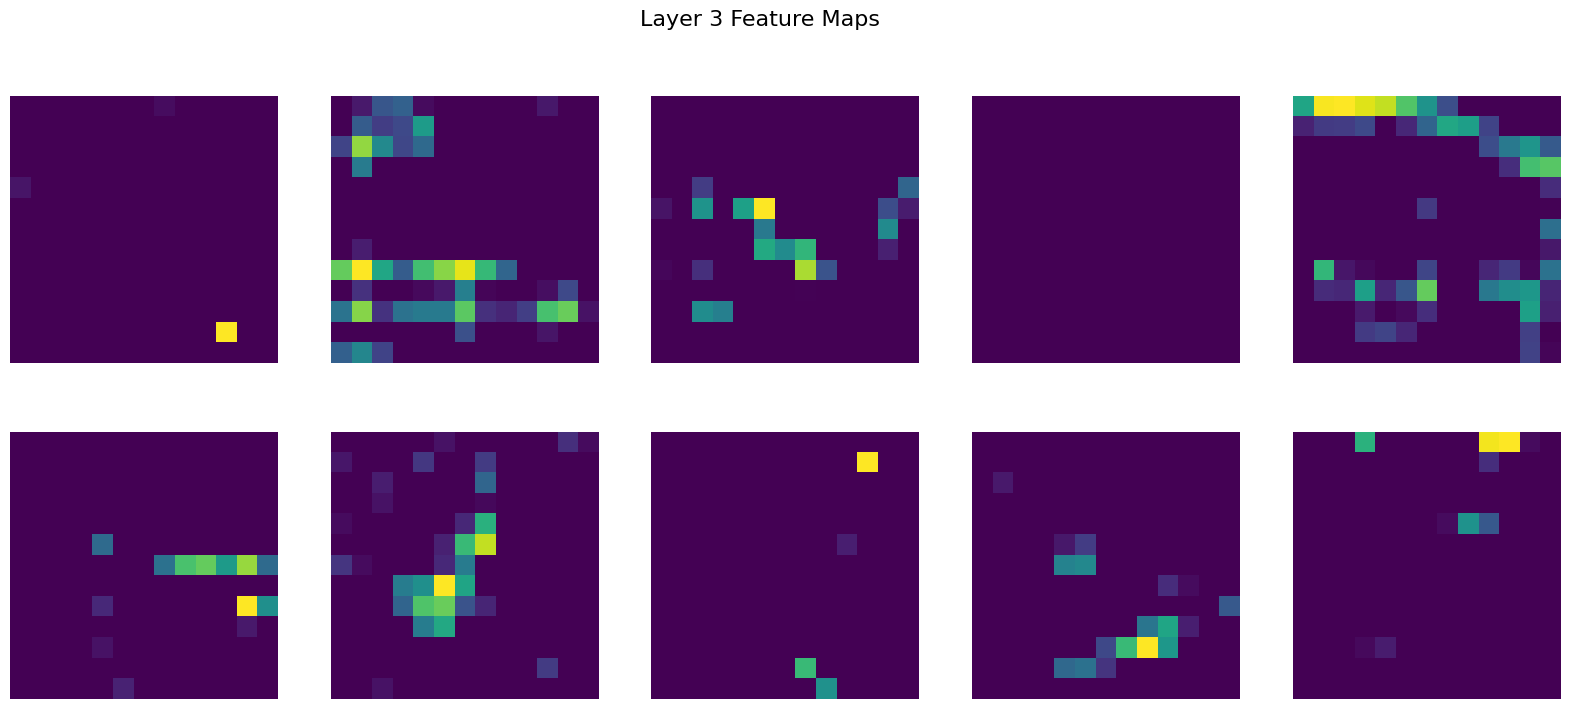

In [5]:
# Generate feature maps for each convolutional layer in the trained model
# Note: Update layer indices based on your model's architecture
layer_outputs = [model.layers[0].output, model.layers[2].output, model.layers[4].output]  # Example layers
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Use the first 10 images from the test set for visualization
x_sample_test = x_train[:10]

# Predict to get the activations
activations_after_training = activation_model.predict(x_sample_test)

# Plot the feature maps after each convolutional layer, after training
for layer_num, feature_maps in enumerate(activations_after_training, start=1):
    plot_feature_maps(feature_maps, layer_num)
